In [6]:
%pip install python_tsp
import numpy as np
import math
import matplotlib.pyplot as plt
from python_tsp.heuristics import solve_tsp_local_search
from python_tsp.heuristics import solve_tsp_simulated_annealing
from python_tsp.exact import solve_tsp_dynamic_programming
import time
from python_tsp.exact import solve_tsp_brute_force
import random
import pandas as pd
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [31]:
ad = "Data/PDP_TW (1).xlsx"
print(ad)
df = pd.read_excel(ad) 
df = df[["Pos1","Pos2"]]
coordinates_arr = np.array(df)
dist = []
for i in range(coordinates_arr.shape[0]):
    arr = []
    for j in range(coordinates_arr.shape[0]):
        if i == j:
            arr.append(0)
        else:
            arr.append(math.dist(coordinates_arr[i,1:],coordinates_arr[j,1:]))
    dist.append(arr)
dist = np.array(dist,dtype = 'int')

# dp 로 구한 정확한 해 
before_time = time.time()
dp_kernel = solve_tsp_dynamic_programming(dist)
dp_distance = dp_kernel[1]
dp_permutation = dp_kernel[0]
after_time = time.time() 
print("DP")
print(f"distance : {dp_distance}")
print(f"dp_permutation : {dp_permutation}")
print('시간 :',after_time - before_time)
print()


# sa 로 구한 해 
before_time = time.time()
kernel = solve_tsp_simulated_annealing(dist)
sa_distance = kernel[1]
sa_permutation = kernel[0]
after_time = time.time() 

print("SA")
print(f"distance : {sa_distance}")
print(f"sa_permutation : {sa_permutation}")
print('시간: ',after_time - before_time)
print(f'오차 : {(sa_distance-dp_distance)/ dp_distance}')
print()


# local_Search로 구한것
before_time = time.time()
ls_permutation, ls_distance = solve_tsp_local_search(dist)
after_time = time.time()

print("LocalSearch")
print(f"distance : {ls_distance}")
print(f"ls_permutation : {ls_permutation}")
print('시간 :', after_time - before_time)
print(f'오차 : {(ls_distance-dp_distance)/ dp_distance }')



Data/PDP_TW (1).xlsx
DP
distance : 1798
dp_permutation : [0, 1, 9, 14, 11, 8, 3, 18, 4, 7, 15, 5, 19, 2, 10, 12, 13, 16, 17, 6]
시간 : 102.89001607894897

SA
distance : 1798
sa_permutation : [0, 4, 18, 14, 9, 11, 1, 8, 3, 7, 15, 5, 19, 6, 17, 10, 12, 13, 16, 2]
시간:  0.46647095680236816
오차 : 0.0

LocalSearch
distance : 1798
ls_permutation : [0, 6, 17, 16, 12, 10, 13, 2, 19, 7, 4, 3, 8, 1, 11, 14, 9, 18, 15, 5]
시간 : 0.007728099822998047
오차 : 0.0


## sa로구한 해의 그래프

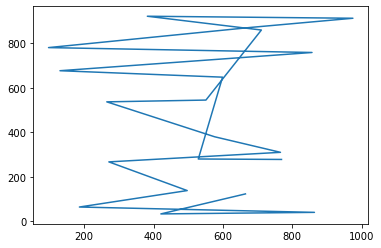

<Figure size 57600x43200 with 0 Axes>

In [30]:
sa_x_list = [];sa_y_list = []
for i in range(20):

    
    x = coordinates_arr[sa_permutation[i]][0]
    y = coordinates_arr[sa_permutation[i]][1]
    sa_x_list.append(x)
    sa_y_list.append(y)
    
plt.plot(sa_x_list,sa_y_list)
plt.figure(figsize=(800,600))
plt.show()


## ls로 구한 해의 그래프

In [29]:
ls_x_list = [];ls_y_list = []
print(ls_permutation)
for i in range(20):
    x = coordinates_arr[i][1]
    y = coordinates_arr[i][2]
    ls_x_list.append(x)
    ls_y_list.append(y)

plt.plot(ls_x_list,ls_y_list)
plt.figure(figsize=(800,600))
plt.show()

[0, 7, 5, 10, 4, 17, 12, 2, 9, 16, 6, 18, 3, 15, 19, 8, 13, 14, 11, 1]


IndexError: index 2 is out of bounds for axis 0 with size 2

## dp로 구한 해의 그래프

In [20]:
dp_x_list = [];dp_y_list = []
print(kernel[0])
for i in range(20):
    x = coordinates_arr[dp_permutation[i]][1]
    y = coordinates_arr[dp_permutation[i]][2]
    dp_x_list.append(x)
    dp_y_list.append(y)

plt.plot(dp_x_list,dp_y_list)
plt.figure(figsize=(800,600))
plt.show()

[0, 7, 4, 18, 17, 12, 10, 1, 8, 5, 3, 2, 16, 15, 19, 13, 11, 9, 14, 6]


IndexError: index 2 is out of bounds for axis 0 with size 2